In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Load dataset (Pastikan file 'data (1).csv' sudah diupload ke Colab)
df = pd.read_csv('data.csv')

# Pembersihan awal: Hapus kolom yang tidak berguna (id dan kolom kosong di akhir)
df = df.drop(['id', 'Unnamed: 32'], axis=1)

print("5 Data Teratas:")
df.head()

5 Data Teratas:


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


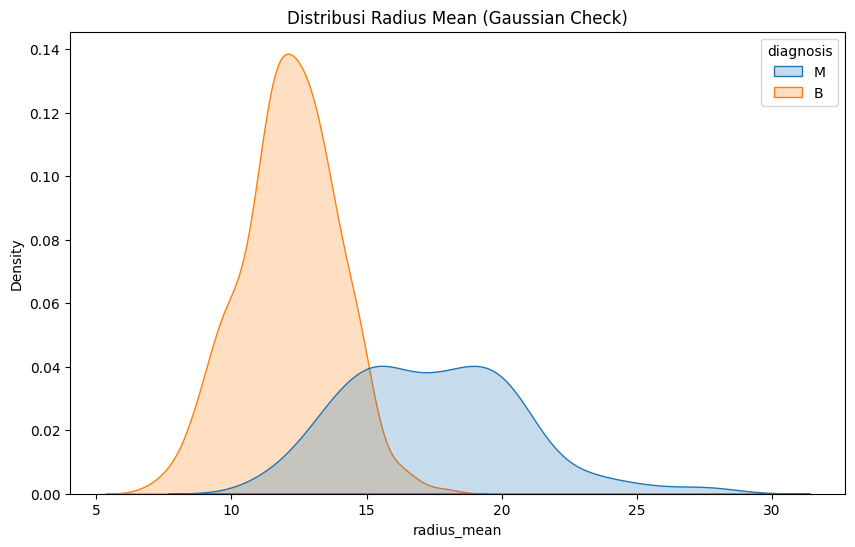

In [2]:
# Visualisasi distribusi 'radius_mean' berdasarkan diagnosis
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='radius_mean', hue='diagnosis', fill=True)
plt.title('Distribusi Radius Mean (Gaussian Check)')
plt.show()

In [3]:
# 1. Label Encoding untuk Target (M/B -> 1/0)
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# Pisahkan Fitur (X) dan Target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# 2. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Standard Scaling (WAJIB untuk Gaussian NB sesuai modul)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Akurasi Model: 96.49%

Confusion Matrix:


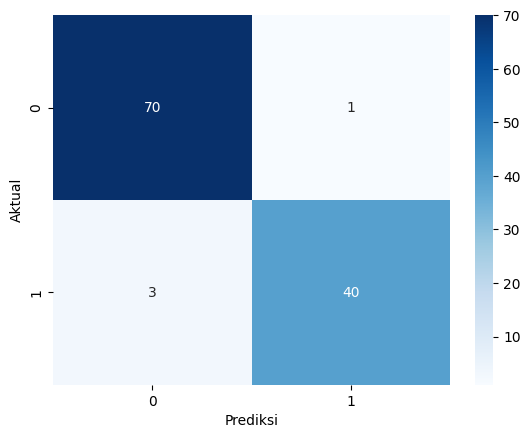


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [4]:
# Inisialisasi Gaussian Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Prediksi data test
y_pred = classifier.predict(X_test)

# Evaluasi
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print(f"Akurasi Model: {acc * 100:.2f}%")
print("\nConfusion Matrix:")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [5]:
# Ambil satu data dari X_test sebagai simulasi
sample_data = X_test[0:1]
prediksi = classifier.predict(sample_data)
probabilitas = classifier.predict_proba(sample_data)

print(f"Hasil Prediksi: {'Ganas (M)' if prediksi[0] == 1 else 'Jinak (B)'}")
print(f"Tingkat Keyakinan Model:")
print(f"- Peluang Jinak: {probabilitas[0][0]*100:.2f}%")
print(f"- Peluang Ganas: {probabilitas[0][1]*100:.2f}%")

Hasil Prediksi: Jinak (B)
Tingkat Keyakinan Model:
- Peluang Jinak: 100.00%
- Peluang Ganas: 0.00%


In [7]:
import joblib

joblib.dump(classifier, 'model_gnb.pkl')
joblib.dump(sc, 'scaler.pkl')


['scaler.pkl']